In [1]:
import matplotlib.pyplot as plt
import setup
import numpy as np
import torch
from tqdm import tqdm
from model import MLP
from dataloaders import DemoDataset
from utils import read_json

In [2]:
# setup dataloader instances
cfg = read_json("config.json")
dataset_cfg = cfg["dataset"]
dataloader_cfg = cfg["dataloader"]
test_cfg = cfg["test"]

# train on recording_0002_2020_12_3, with all data
dataset = DemoDataset(**dataset_cfg["params"])

dataset start time 1.099132776260376, end time 13.03284478187561
there are 1194 samples


In [3]:
# build model architecture, then print to console
model = MLP(input_dims=12, output_dims=6)
# get function handles of loss and metrics
criterion = torch.nn.MSELoss()
metrics = []

ckpt = torch.load("saved/ckpts/ckpt-epoch100.pth")
model.load_state_dict(ckpt["state_dict"])

# device = torch.device('cuda')
model = model.to('cuda')
model.eval()

loss_ls = []
total_metrics = torch.zeros(len(metrics))

with torch.no_grad():
    for i in tqdm(range(len(dataset))):
        state_action, target = dataset.__getitem__(i)
        state_action = torch.tensor(state_action).to('cuda')
        target = torch.tensor(target).to('cuda')     
       
        output = model(state_action)

        loss = criterion(output, target)
        loss_ls.append(loss.item())

100%|██████████| 1194/1194 [00:00<00:00, 2194.66it/s]


In [4]:
time_stamp = np.arange(1.099132776260376, 13.03284478187561, 0.01)

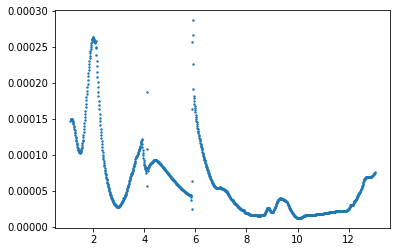

In [5]:
plt.scatter(time_stamp, loss_ls, s=2)

- at 2s, the arm is pulling the shaft out of the start point
- at 4s, the arm touch the hole a little
- at 6s, the arm inserting the shaft, maybe the shaft has touch the hole.

Take away message, the model acts bad at transitions. Otherwise, contacting the environment or not does not matter.